# EDA COVID-19 DATA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the data
df = pd.read_csv('../../Di/data/Pol5.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (6,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Cleaning

In [3]:
df.head()

,time,id,text,user,uid,hashtag,symbol,mention_username,mention_id,mention_realname,...,rtusername,quote_count,reply_count,retweet_count,favorite_count,lang,rtb,rtcheck,mentioncheck,replycheck
0,2020-05-14 20:20:03+00:00,1261028523772391424,Too many families were already struggling to n...,MurrayCampaign,158470209,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,en,False,False,False,False
1,2020-05-14 20:20:03+00:00,1261028524795838466,@realDonaldTrump @trish_regan China sent the v...,MariKay77,727153519,NaN,NaN,realDonaldTrump trish_regan,25073877 138182116,Donald J. Trump Trish Regan,...,NaN,0,0,0,0,en,True,False,True,True
2,2020-05-14 20:20:04+00:00,1261028526020538375,@eileeniorio @LotusOak2 @POTUS You are very na...,GlendaMcRose,1370806812,NaN,NaN,eileeniorio LotusOak2 POTUS,2932344645 424664120 822215679726100480,EileenIorio LotusOak President Trump,...,NaN,0,0,0,0,en,True,False,True,False
3,2020-05-14 20:20:04+00:00,1261028529451479048,@lien2marsha @OttoPardey @RepFredKeller @White...,jazbec_mike,965060983646572544,NaN,NaN,lien2marsha OttoPardey RepFredKeller WhiteHous...,3882819740 1260226019287601153 113606076142240...,Marsha Lien Otto Pardey Congressman Fred Kelle...,...,NaN,0,0,0,0,en,True,False,True,False
4,2020-05-14 20:20:06+00:00,1261028537995276294,@ProfFionasm @ChrisMurphyCT last leg delivery ...,thatotherGH,190373454,NaN,NaN,ProfFionasm ChrisMurphyCT,913093166638731264 150078976,Fiona Scott Morton Chris Murphy,...,NaN,0,0,0,0,en,True,False,True,False


In [9]:
#First I want to get a sense of the missing data
null_vals = 100 * df.isnull().sum() / len(df) #Here I express the number of null values for each column as a percentage of the total rows
print(null_vals)

time                          0.000000
id                            0.000000
text                          0.000000
user                          0.000000
uid                           0.000000
mention_username              0.723220
mention_id                    0.723220
mention_realname              0.723220
url                          22.653821
expanded_url                 22.653821
source                        0.000000
in_reply_to_id               13.771711
in_reply_to_uid               7.563737
in_reply_to_username          7.563737
user_loc                     43.649626
user_created_at               0.000000
user_follower_count           0.000000
user_favorite_count           0.000000
user_friends_count            0.000000
user_status_count             0.000000
user_listed_count             0.000000
user_description             26.039959
user_protected                0.000000
user_geo_enabled              0.000000
user_contributors_enabled     0.000000
user_is_translator       

In [10]:
# I am going to go ahead and drop any column that is over 90% null as they are not going to add any value to the dataset
df = df.drop(null_vals[null_vals >= 75].index, axis=1)

In [11]:
#Okay let's look at this again
null_vals = 100 * df.isnull().sum() / len(df) 
print(null_vals)

time                          0.000000
id                            0.000000
text                          0.000000
user                          0.000000
uid                           0.000000
mention_username              0.723220
mention_id                    0.723220
mention_realname              0.723220
url                          22.653821
expanded_url                 22.653821
source                        0.000000
in_reply_to_id               13.771711
in_reply_to_uid               7.563737
in_reply_to_username          7.563737
user_loc                     43.649626
user_created_at               0.000000
user_follower_count           0.000000
user_favorite_count           0.000000
user_friends_count            0.000000
user_status_count             0.000000
user_listed_count             0.000000
user_description             26.039959
user_protected                0.000000
user_geo_enabled              0.000000
user_contributors_enabled     0.000000
user_is_translator       

In [12]:
#Next, I would like to make sure the dates are in date time format
df.dtypes[:5]

time    datetime64[ns, UTC]
id                    int64
text                 object
user                 object
uid                   int64
dtype: object

In [13]:
df['time'] = df['time'].apply(lambda timestamp : pd.to_datetime(timestamp))

In [14]:
#Lets take a look at the retweet column
df.retweet.unique()

array([False])

In [15]:
#It looks like this category is useless as retweets have already been filtered out so dropping this
df = df.drop('retweet',axis=1)

In [16]:
#for i in df.columns:
    #if (i != 'text'):
        #print(df[i].value_counts())
        #print('––––––––––––––––––––')

In [17]:
#Dropping all of the valueless information like columns that are all one value or all null
df = df.drop(['rtcheck','favorite_count','retweet_count','reply_count',
         'quote_count','quote','user_is_translator',
         'user_contributors_enabled','user_protected'], axis=1)

In [18]:
#Extracting the weeks and months from the dates
df['month'] = df['time'].apply(lambda date: date.month)
df['week'] = df['time'].apply(lambda date: date.week)

/tmp/ipykernel_13105/1906549374.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df['time'].apply(lambda date: date.week)


<AxesSubplot:title={'center':'Plot of number of tweets per month'}, xlabel='month', ylabel='Count'>

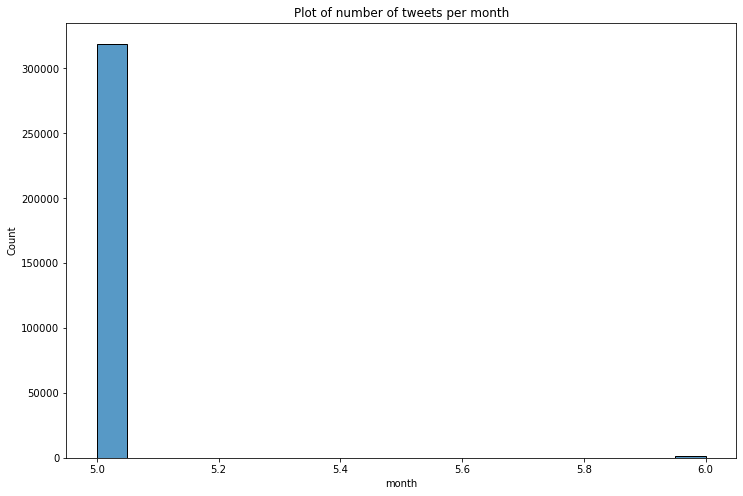

In [19]:
#Lets get a better idea of how tweet volume varies over time
plt.figure(figsize=(12,8))
plt.title('Plot of number of tweets per month')
sns.histplot(data=df, x='month')

<AxesSubplot:title={'center':'Plot of number of tweets per week'}, xlabel='week', ylabel='Count'>

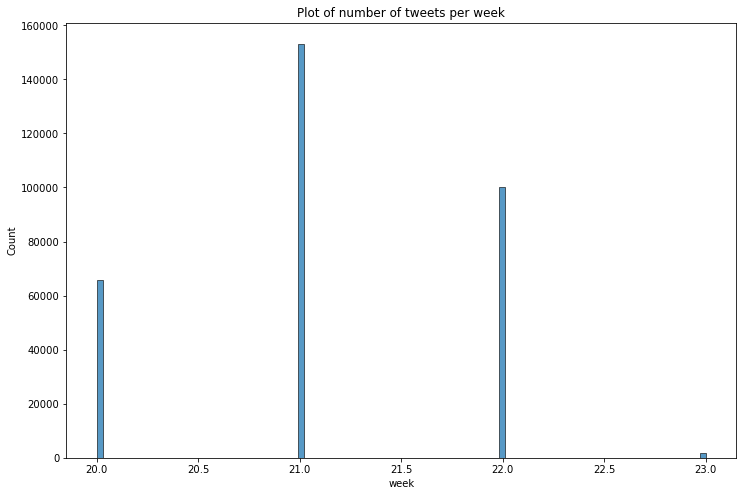

In [20]:
#Lets get a better idea of how tweet volume varies over time
plt.figure(figsize=(12,8))
plt.title('Plot of number of tweets per week')
sns.histplot(data=df, x='week')

In [21]:
df.head()

,time,id,text,user,uid,mention_username,mention_id,mention_realname,url,expanded_url,...,user_listed_count,user_description,user_geo_enabled,user_verified,lang,rtb,mentioncheck,replycheck,month,week
0,2020-05-14 20:20:03+00:00,1261028523772391424,Too many families were already struggling to n...,MurrayCampaign,158470209,NaN,NaN,NaN,https://t.co/bC9V4gBcyo,https://twitter.com/i/web/status/1261028523772...,...,895,Senior U.S. Senator from the great state of Wa...,False,True,en,False,False,False,5,20
1,2020-05-14 20:20:03+00:00,1261028524795838466,@realDonaldTrump @trish_regan China sent the v...,MariKay77,727153519,realDonaldTrump trish_regan,25073877 138182116,Donald J. Trump Trish Regan,https://t.co/Ru0xA0e9Rn,https://twitter.com/i/web/status/1261028524795...,...,6,NaN,False,False,en,True,True,True,5,20
2,2020-05-14 20:20:04+00:00,1261028526020538375,@eileeniorio @LotusOak2 @POTUS You are very na...,GlendaMcRose,1370806812,eileeniorio LotusOak2 POTUS,2932344645 424664120 822215679726100480,EileenIorio LotusOak President Trump,https://t.co/CDlWvD59ro,https://twitter.com/i/web/status/1261028526020...,...,103,"“Just because a man has died for it, does not ...",True,False,en,True,True,False,5,20
3,2020-05-14 20:20:04+00:00,1261028529451479048,@lien2marsha @OttoPardey @RepFredKeller @White...,jazbec_mike,965060983646572544,lien2marsha OttoPardey RepFredKeller WhiteHous...,3882819740 1260226019287601153 113606076142240...,Marsha Lien Otto Pardey Congressman Fred Kelle...,https://t.co/wPGVpx4jji,https://twitter.com/i/web/status/1261028529451...,...,0,NaN,False,False,en,True,True,False,5,20
4,2020-05-14 20:20:06+00:00,1261028537995276294,@ProfFionasm @ChrisMurphyCT last leg delivery ...,thatotherGH,190373454,ProfFionasm ChrisMurphyCT,913093166638731264 150078976,Fiona Scott Morton Chris Murphy,https://t.co/Dc3wyhnyeo,https://twitter.com/i/web/status/1261028537995...,...,0,NaN,False,False,en,True,True,False,5,20


In [22]:
#Now I will create labled data for testing with liwc
import liwc
import spacy

2022-04-10 01:18:10.866862: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-10 01:18:10.866897: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [23]:
#Setting up our LIWC Analysis
parse, category_names = liwc.load_token_parser('../LIWC2015_English.dic')

In [24]:
nlp = spacy.load('en_core_web_sm')

In [25]:
df['lemmas'] = df['text'].apply(lambda words : [i.lemma_ for i in nlp(words)])

In [26]:
#Counting the words of each catagory
from collections import Counter
df['labels'] = df['lemmas'].apply(lambda lems : dict(sorted(Counter(category for token in lems for category in parse(token)).items(),
    reverse=True,key=lambda x : x[1])))